<a href="https://colab.research.google.com/github/NM1729/Aerosol-Index-Analysis/blob/main/Aerosol_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/aneeshsharma/AerosolIndexAnalysis.git

Cloning into 'AerosolIndexAnalysis'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
cd AerosolIndexAnalysis/data

/content/AerosolIndexAnalysis/data


In [ ]:
ls

ahmadabad_weekly.csv   chennai_weekly.csv    kolkata_weekly.csv
bangalore_weekly.csv   delhi_weekly.csv      mumbai_weekly.csv
bangalore_weekly.xlsx  hyderabad_weekly.csv  placeholder
bhopal_weekly.csv      jaipur_weekly.csv     pune_weekly.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
dic = {}
filenames = []
for filename in os.listdir(os.getcwd()):
    if filename[-4:] == '.csv':
        name = filename[:-4]
        dic[name] = pd.read_csv(filename)
        if(len(dic[name].columns) == 4):
            dic[name].drop(columns="Unnamed: 0",inplace=True)
        dic[name].columns = ['ward_no','date','mean']
        filenames.append(filename)
print(dic['delhi_weekly'])

      ward_no        date      mean
0         150  2018-07-10 -0.417784
1         176  2018-07-10 -0.491721
2         129  2018-07-10 -0.396762
3         173  2018-07-10 -0.438226
4         140  2018-07-10 -0.220974
...       ...         ...       ...
34097      35  2020-10-06 -0.615338
34098     219  2020-10-06 -0.619774
34099      26  2020-10-06 -0.731513
34100     187  2020-10-06 -0.737521
34101     115  2020-10-06 -0.622233

[34102 rows x 3 columns]


In [ ]:
avg = []
for city in clean:
    avg.append(city.groupby('date').agg({'mean': ['mean']}).reset_index())

In [ ]:
avg[0]

,date,mean
,,mean
0,2018-07-10,-0.620513
1,2018-07-17,-0.691992
2,2018-07-24,-0.264672
3,2018-07-31,-0.159207
4,2018-08-07,-0.309478
...,...,...
113,2020-09-08,-1.289314
114,2020-09-15,-1.270018
115,2020-09-22,-1.313275


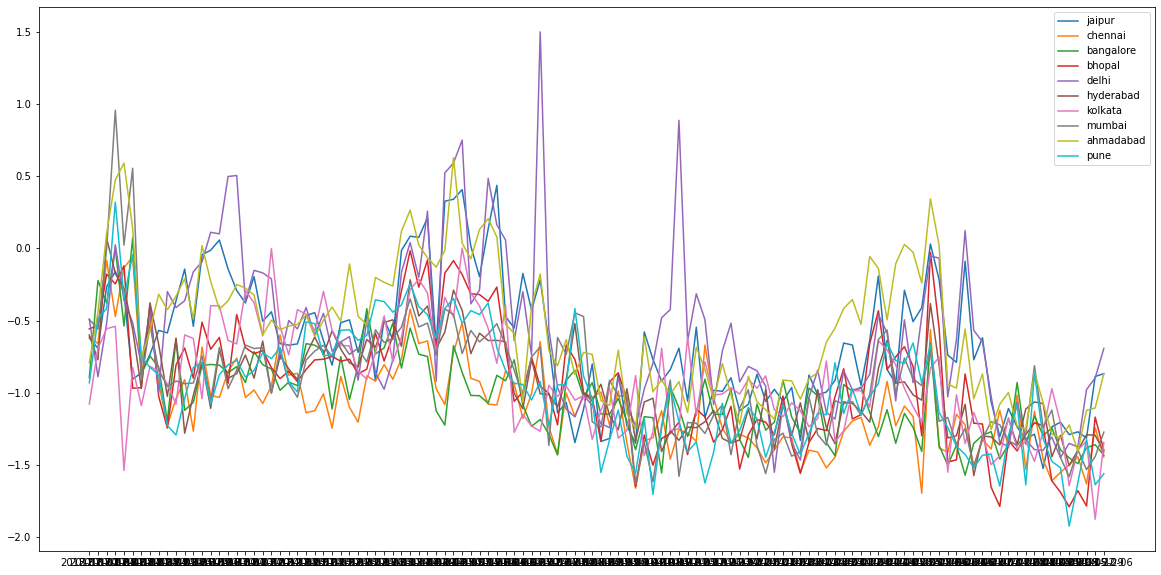

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
city_names = [name[:name.index('_')] for name in filenames]

plt.figure(figsize=(20, 10))
for i in range(len(avg)):
    city = avg[i]
    plt.plot(city['date'], city['mean']['mean'])
    # city.plot(x='date', y='mean', figsize=(20, 10), kind='line', title=city_names[i])
plt.legend(city_names)
plt.savefig("mean_plot.png", quality=95)